In [ ]:
!pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 394.0 kB/s eta 0:00:0000:0100:01


In [1]:
import os
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt

**Load The Data**

In [2]:
current_dir = os.getcwd() 
relative_path_train = os.path.join('..', 'data', 'train_data_after_EDA.csv')
preprocessed_train_data = pd.read_csv(os.path.join(current_dir, relative_path_train))

**Encode The Data**

In [3]:
# first convert all data to str type to get encoded using get_dummies
for col in preprocessed_train_data.columns:
    preprocessed_train_data[col] = preprocessed_train_data[col].astype(str)

In [4]:
# Apply get_dummies
encoded_data = pd.get_dummies(preprocessed_train_data)

**Apply Apriori algorithm**

In [5]:
# Filter out itemsets that have support values below a specified threshold.
# Support refers to the proportion of transactions in a dataset in which a particular itemset appears.
min_support = 0.25

# Set the minimum cardinality
min_cardinality = 2

frequent_itemsets = apriori(encoded_data, min_support=min_support, use_colnames=True)

# Filter frequent itemsets based on minimum cardinality
frequent_itemsets_filtered = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) >= min_cardinality)]


# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

**Display top 100 frequent itemsets**

In [6]:
# Get the top 100 frequent itemsets based on support
top_100_frequent_itemsets = frequent_itemsets_filtered.sort_values(by='support', ascending=False).head(100)
top_100_frequent_itemsets

,support,itemsets
32,0.508527,"(Type of Travel_Business travel, Customer Type..."
40,0.461878,"(Customer Type_Loyal Customer, Departure Delay..."
43,0.457230,"(Class_Business, Type of Travel_Business travel)"
41,0.427221,"(satisfaction_neutral or dissatisfied, Custome..."
28,0.408695,"(Customer Type_Loyal Customer, Gender_Male)"
24,0.408627,"(Gender_Female, Customer Type_Loyal Customer)"
34,0.407193,"(Class_Business, Customer Type_Loyal Customer)"
48,0.401775,"(Type of Travel_Business travel, satisfaction_..."
42,0.390100,"(Customer Type_Loyal Customer, satisfaction_sa..."
46,0.389196,"(Type of Travel_Business travel, Departure Del..."


**Sort the generated rules**

In [14]:
# Sort the association rules based on confidence and lift
sorted_rules_confidence = rules.sort_values(by='confidence', ascending=False)
sorted_rules_lift = rules.sort_values(by='lift', ascending=False)
sorted_rules_support = rules.sort_values(by='support', ascending=False)

**The rules sorted by support**

In [19]:
sorted_rules_support.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
17,(Departure Delay in Minutes_0),(Customer Type_Loyal Customer),0.564637,0.817322,0.461878,0.818010,1.000842,0.000389,1.003781,0.001932
16,(Customer Type_Loyal Customer),(Departure Delay in Minutes_0),0.817322,0.564637,0.461878,0.565112,1.000842,0.000389,1.001093,0.004604
21,(Type of Travel_Business travel),(Class_Business),0.689627,0.477989,0.457230,0.663010,1.387082,0.127595,1.549040,0.899118
20,(Class_Business),(Type of Travel_Business travel),0.477989,0.689627,0.457230,0.956569,1.387082,0.127595,7.146350,0.534591
6,(Customer Type_Loyal Customer),(Gender_Male),0.817322,0.492541,0.408695,0.500041,1.015227,0.006130,1.015001,0.082105
7,(Gender_Male),(Customer Type_Loyal Customer),0.492541,0.817322,0.408695,0.829767,1.015227,0.006130,1.073109,0.029557
10,(Class_Business),(Customer Type_Loyal Customer),0.477989,0.817322,0.407193,0.851888,1.042292,0.016522,1.233376,0.077730
11,(Customer Type_Loyal Customer),(Class_Business),0.817322,0.477989,0.407193,0.498204,1.042292,0.016522,1.040285,0.222115
26,(Type of Travel_Business travel),(satisfaction_satisfied),0.689627,0.433333,0.401775,0.582597,1.344457,0.102937,1.357603,0.825475
27,(satisfaction_satisfied),(Type of Travel_Business travel),0.433333,0.689627,0.401775,0.927174,1.344457,0.102937,4.261832,0.452126


In [24]:
'''
Support measures the frequency of occurrence of an itemset in the dataset.
High support values indicate that the itemset is frequently occurring in the dataset.
calculated as the number of transactions containing  X divided by the total number of transactions.

Support(X) = the number of transactions containing X / the total number of transactions.
'''

'\nSupport measures the frequency of occurrence of an itemset in the dataset.\nHigh support values indicate that the itemset is frequently occurring in the dataset.\ncalculated as the number of transactions containing  X divided by the total number of transactions.\n\nSupport(X) = the number of transactions containing X / the total number of transactions.\n'

**The rules sorted by confidence**

In [21]:
sorted_rules_confidence.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
63,"(satisfaction_neutral or dissatisfied, Type of...",(Customer Type_Loyal Customer),0.278815,0.817322,0.277487,0.995236,1.217680,0.049605,38.349193,0.247879
9,(Type of Travel_Personal Travel),(Customer Type_Loyal Customer),0.310373,0.817322,0.308795,0.994915,1.217286,0.055120,35.921894,0.258836
57,"(Class_Eco, Type of Travel_Personal Travel)",(Customer Type_Loyal Customer),0.254928,0.817322,0.253494,0.994375,1.216626,0.045136,32.475042,0.238976
83,"(Class_Business, satisfaction_satisfied)",(Type of Travel_Business travel),0.331845,0.689627,0.329304,0.992343,1.438957,0.100455,40.536600,0.456559
90,"(Class_Business, Customer Type_Loyal Customer,...",(Type of Travel_Business travel),0.303848,0.689627,0.301307,0.991638,1.437934,0.091765,37.116618,0.437487
78,"(Class_Business, Departure Delay in Minutes_0)",(Type of Travel_Business travel),0.269345,0.689627,0.257892,0.957479,1.388401,0.072144,7.299244,0.382871
20,(Class_Business),(Type of Travel_Business travel),0.477989,0.689627,0.457230,0.956569,1.387082,0.127595,7.146350,0.534591
43,"(Class_Business, Customer Type_Loyal Customer)",(Type of Travel_Business travel),0.407193,0.689627,0.386539,0.949278,1.376509,0.105728,6.119093,0.461406
27,(satisfaction_satisfied),(Type of Travel_Business travel),0.433333,0.689627,0.401775,0.927174,1.344457,0.102937,4.261832,0.452126
52,"(Customer Type_Loyal Customer, satisfaction_sa...",(Type of Travel_Business travel),0.390100,0.689627,0.358793,0.919744,1.333684,0.089769,3.867307,0.410227


In [25]:
'''
Confidence measures the reliability or certainty of a rule.
how often items in the consequent of the rule appear in transactions that contain the items
in the antecedent.

X ==> Y = Support(X U Y) / support (X)
'''

'\nConfidence measures the reliability or certainty of a rule.\nhow often items in the consequent of the rule appear in transactions that contain the items\nin the antecedent.\n\nX ==> Y = Support(X U Y) / support (X)\n'

**The rules sorted by lift**

In [20]:
sorted_rules_lift.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
61,(Type of Travel_Personal Travel),"(Class_Eco, Customer Type_Loyal Customer)",0.310373,0.344886,0.253494,0.816739,2.368143,0.146450,3.574752,0.837740
56,"(Class_Eco, Customer Type_Loyal Customer)",(Type of Travel_Personal Travel),0.344886,0.310373,0.253494,0.735008,2.368143,0.146450,2.602441,0.881874
62,"(satisfaction_neutral or dissatisfied, Custome...",(Type of Travel_Personal Travel),0.427221,0.310373,0.277487,0.649516,2.092694,0.144889,1.967640,0.911603
67,(Type of Travel_Personal Travel),"(satisfaction_neutral or dissatisfied, Custome...",0.310373,0.427221,0.277487,0.894043,2.092694,0.144889,5.405777,0.757144
96,"(Type of Travel_Business travel, satisfaction_...","(Class_Business, Customer Type_Loyal Customer)",0.401775,0.407193,0.301307,0.749940,1.841731,0.137707,2.370659,0.763980
93,"(Class_Business, Customer Type_Loyal Customer)","(Type of Travel_Business travel, satisfaction_...",0.407193,0.401775,0.301307,0.739961,1.841731,0.137707,2.300519,0.770963
28,(Class_Eco),(Type of Travel_Personal Travel),0.449886,0.310373,0.254928,0.566649,1.825703,0.115295,1.591381,0.822131
29,(Type of Travel_Personal Travel),(Class_Eco),0.310373,0.449886,0.254928,0.821359,1.825703,0.115295,3.079433,0.655812
58,"(Customer Type_Loyal Customer, Type of Travel_...",(Class_Eco),0.308795,0.449886,0.253494,0.820913,1.824712,0.114571,3.071771,0.653884
59,(Class_Eco),"(Customer Type_Loyal Customer, Type of Travel_...",0.449886,0.308795,0.253494,0.563461,1.824712,0.114571,1.583377,0.821591


In [26]:
'''
Lift measures the strength of association between the antecedent and consequent of a rule, 
independent of the support levels of individual items.

It compares the observed support of the rule with the expected support under the assumption of independence.

Lift greater than 1 indicates that the antecedent and consequent occur together more frequently than expected by chance (positive association) 
lift less than 1 indicates less frequent occurrence than expected (negative association).
lift(X ==> Y) = support(X U Y) / (support(X) * support(Y))
'''

'\nLift measures the strength of association between the antecedent and consequent of a rule, \nindependent of the support levels of individual items.\n\nIt compares the observed support of the rule with the expected support under the assumption of independence.\n\nLift greater than 1 indicates that the antecedent and consequent occur together more frequently than expected by chance (positive association) \nlift less than 1 indicates less frequent occurrence than expected (negative association).\nlift(X ==> Y) = support(X U Y) / (support(X) * support(Y))\n'

**Most frequent 2 itemsets**

In [10]:
# Sort frequent 2-itemsets by support
frequent_itemsets_2_sorted = frequent_itemsets_filtered.sort_values(by='support', ascending=False)

# Get the most frequent 2-itemset and its support
most_frequent_2_itemset = frequent_itemsets_2_sorted.iloc[0]['itemsets']
frequency = frequent_itemsets_2_sorted.iloc[0]['support']

print("Most frequent 2-itemset:", most_frequent_2_itemset)
print("Frequency:", frequency)

Most frequent 2-itemset: frozenset({'Type of Travel_Business travel', 'Customer Type_Loyal Customer'})
Frequency: 0.5085271019402525


**Plot the top 5 frequent items**

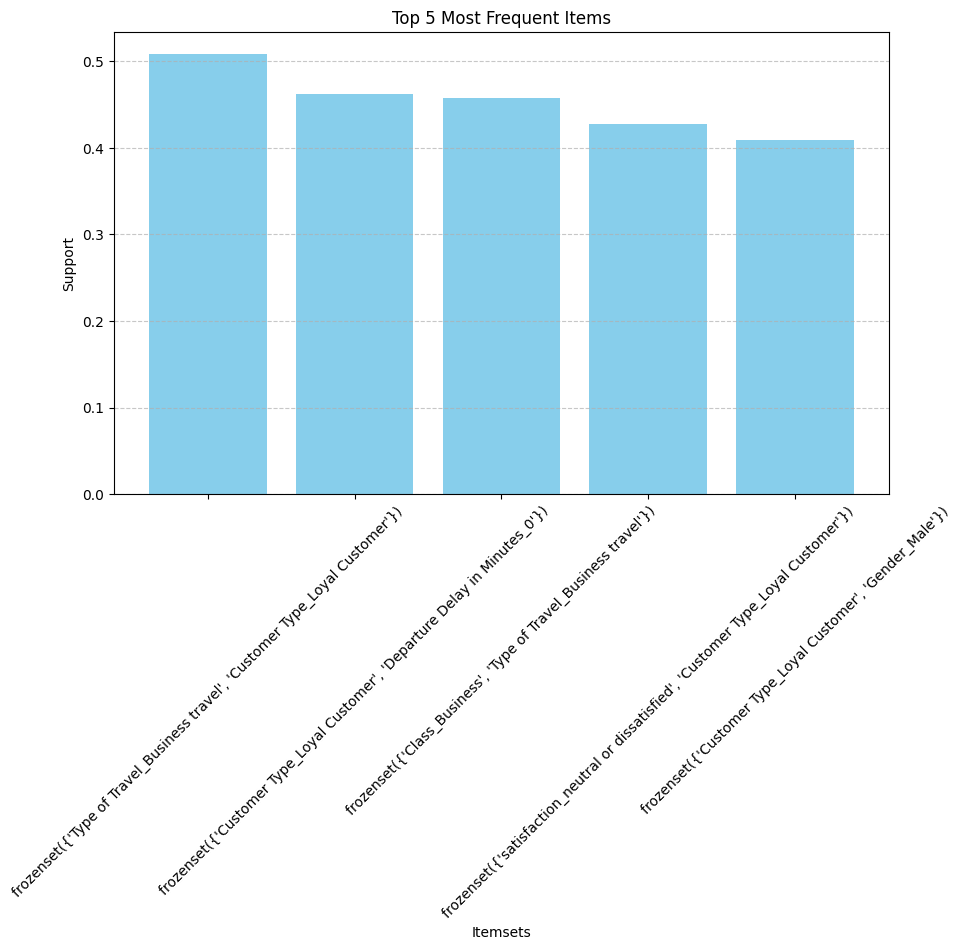

In [11]:
# Sort frequent itemsets by support in descending order
sorted_frequent_itemsets = frequent_itemsets_filtered.sort_values(by='support', ascending=False)

# Select the top 5 frequent itemsets
top_5_frequent_itemsets = sorted_frequent_itemsets.head(5)

# Plot the top 5 frequent items
plt.figure(figsize=(10, 6))
plt.bar(top_5_frequent_itemsets['itemsets'].astype(str), top_5_frequent_itemsets['support'], color='skyblue')
plt.title('Top 5 Most Frequent Items')
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Plot the association rules**

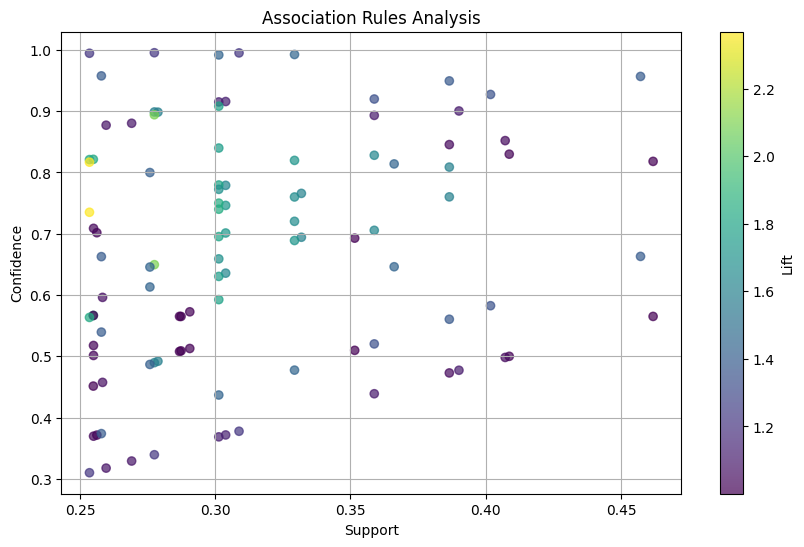

In [18]:
# Plot the association rules
plt.figure(figsize=(10, 6))
scatter = plt.scatter(rules['support'], rules['confidence'], c=rules['lift'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules Analysis')
plt.grid(True)
plt.show()

In [39]:
# Sort rules by lift in descending order
top_10_rules = rules.sort_values(by='lift', ascending=False).head(10)

# Select only 'antecedents', 'consequents', and 'lift' columns
top_10_rules_subset = top_10_rules[['antecedents', 'consequents', 'lift', 'confidence', 'support']]

top_10_rules_subset

,antecedents,consequents,lift,confidence,support
61,(Type of Travel_Personal Travel),"(Class_Eco, Customer Type_Loyal Customer)",2.368143,0.816739,0.253494
56,"(Class_Eco, Customer Type_Loyal Customer)",(Type of Travel_Personal Travel),2.368143,0.735008,0.253494
62,"(satisfaction_neutral or dissatisfied, Custome...",(Type of Travel_Personal Travel),2.092694,0.649516,0.277487
67,(Type of Travel_Personal Travel),"(satisfaction_neutral or dissatisfied, Custome...",2.092694,0.894043,0.277487
96,"(Type of Travel_Business travel, satisfaction_...","(Class_Business, Customer Type_Loyal Customer)",1.841731,0.749940,0.301307
93,"(Class_Business, Customer Type_Loyal Customer)","(Type of Travel_Business travel, satisfaction_...",1.841731,0.739961,0.301307
28,(Class_Eco),(Type of Travel_Personal Travel),1.825703,0.566649,0.254928
29,(Type of Travel_Personal Travel),(Class_Eco),1.825703,0.821359,0.254928
58,"(Customer Type_Loyal Customer, Type of Travel_...",(Class_Eco),1.824712,0.820913,0.253494
59,(Class_Eco),"(Customer Type_Loyal Customer, Type of Travel_...",1.824712,0.563461,0.253494


**Top 10 Rules Sorted by Lift**

In [40]:
print("Top 10 Rules Sorted by Lift:")
for index, row in top_10_rules_subset.iterrows():
    antecedent = ', '.join(row['antecedents'])
    consequent = ', '.join(row['consequents'])
    lift = '{:.4f}'.format(row['lift'])
    confidence = '{:.4f}'.format(row['confidence'])
    support = '{:.4f}'.format(row['support'])
    print(f"Antecedents: {antecedent}")
    print(f"Consequents: {consequent}")
    print(f"Lift: {lift}")
    print(f"confidence: {confidence}")
    print(f"support: {support}")


Top 10 Rules Sorted by Lift:
Antecedents: Type of Travel_Personal Travel
Consequents: Class_Eco, Customer Type_Loyal Customer
Lift: 2.3681
confidence: 0.8167
support: 0.2535
Antecedents: Class_Eco, Customer Type_Loyal Customer
Consequents: Type of Travel_Personal Travel
Lift: 2.3681
confidence: 0.7350
support: 0.2535
Antecedents: satisfaction_neutral or dissatisfied, Customer Type_Loyal Customer
Consequents: Type of Travel_Personal Travel
Lift: 2.0927
confidence: 0.6495
support: 0.2775
Antecedents: Type of Travel_Personal Travel
Consequents: satisfaction_neutral or dissatisfied, Customer Type_Loyal Customer
Lift: 2.0927
confidence: 0.8940
support: 0.2775
Antecedents: Type of Travel_Business travel, satisfaction_satisfied
Consequents: Class_Business, Customer Type_Loyal Customer
Lift: 1.8417
confidence: 0.7499
support: 0.3013
Antecedents: Class_Business, Customer Type_Loyal Customer
Consequents: Type of Travel_Business travel, satisfaction_satisfied
Lift: 1.8417
confidence: 0.7400
suppo

**Looking at the rules sorted by lift**

In [37]:
'''
the most interesting rules that are likely to provide real business value and insights are those with high lift values. 
Lift measures how much more likely the consequent (rhs) is, given the antecedent (lhs), compared to if the two were independent.

# Looking at the rules sorted by lift:

{Type of Travel_Personal Travel} ==> 
    {Class_Eco, Customer Type_Loyal Customer} 
    with Lift: 2.3681
        confidence: 0.8167
        support: 0.2535

{Class_Eco, Customer Type_Loyal Customer} 
    ==> {Type of Travel_Personal Travel} 
    with lift = 2.3681
        confidence: 0.7350
        support: 0.2535

{satisfaction_neutral or dissatisfied, Customer Type_Loyal Customer} 
    ==> {Type of Travel_Personal Travel} 
    with lift = 2.0927
        confidence: 0.6495
        support: 0.2775

{Type of Travel_Personal Travel} 
    ==> {satisfaction_neutral or dissatisfied, Customer Type_Loyal Customer} 
    with lift = 2.0927
        confidence: 0.8940
        support: 0.2775

{Type of Travel_Business travel, satisfaction_satisfied} 
    ==> {Class_Business, Customer Type_Loyal Customer} 
    with lift = 1.8417
        confidence: 0.7499
        support: 0.3013

{Class_Business, Customer Type_Loyal Customer} 
    ==> {Type of Travel_Business travel, satisfaction_satisfied} 
    with lift = 1.8417
        confidence: 0.7400
        support: 0.3013

{Class_Eco} 
    ==> {Type of Travel_Personal Travel} 
    with lift = 1.8257
        confidence: 0.5666
        support: 0.2549

{Type of Travel_Personal Travel} 
    ==> {Class_Eco} 
    with lift = 1.8257
        confidence: 0.8214
        support: 0.2549

{Customer Type_Loyal Customer, Type of Travel_Personal Travel} 
    ==> {Class_Eco} 
    with lift = 1.8247
        confidence: 0.8209
        support: 0.2535

{Class_Eco} 
    ==> {Customer Type_Loyal Customer, Type of Travel_Personal Travel} 
    with lift = 1.8247
        confidence: 0.5635
        support: 0.2535
'''

'\nthe most interesting rules that are likely to provide real business value and insights are those with high lift values. \nLift measures how much more likely the consequent (rhs) is, given the antecedent (lhs), compared to if the two were independent.\n\n# Looking at the rules sorted by lift:\n\n{Type of Travel_Personal Travel} ==> \n    {Class_Eco, Customer Type_Loyal Customer} \n    with lift = 2.3681\n\n{Class_Eco, Customer Type_Loyal Customer} \n    ==> {Type of Travel_Personal Travel} \n    with lift = 2.3681\n\n{satisfaction_neutral or dissatisfied, Customer Type_Loyal Customer} \n    ==> {satisfaction_neutral or dissatisfied, Customer Type_Loyal Customer} \n    with lift = 2.0927\n\n{Type of Travel_Personal Travel} \n    ==> {satisfaction_neutral or dissatisfied, Customer Type_Loyal Customer} \n    with lift = 2.0927\n\n{Type of Travel_Business travel, satisfaction_satisfied} \n    ==> {Class_Business, Customer Type_Loyal Customer} \n    with lift = 1.8417\n\n{Class_Business, 

**Insights**

In [ ]:
'''
Insights:


- If a customer's type of travel is "Personal Travel", 
then there is a strong association with the customer being classified as "Eco" class and a "Loyal Customer".
- The lift value of 2.3681 indicates that the occurrence of the antecedent and consequent together is 2.3681 times more likely than if they were statistically independent.
- this means that customers who travel for personal reasons are 2.3681 times more likely to be classified 
as "Eco" class and "Loyal Customers" compared to what would be expected if these attributes were unrelated.
- The confidence value of 0.8167 indicates that 81.67% of the transactions that contain "Personal Travel" also contain "Eco" class and "Loyal Customer".
- The support value of 0.2535 indicates that 25.35% of the transactions contain both "Personal Travel" and "Eco" class and "Loyal Customer".


- If a customer is classified as "Eco" class and is a "Loyal Customer", 
then there is a strong association with their type of travel being "Personal Travel".
- The lift value of 2.3681 indicates that the occurrence of the consequent given the antecedent is 2.3681 times more likely than if they were statistically independent.
- this means that customers who are classified as "Eco" class and "Loyal Customers" are 2.3681 times more likely 
to travel for personal reasons compared to what would be expected if these attributes were unrelated.
- The confidence value of 0.7350 indicates that 73.50% of the transactions that contain "Eco" class and "Loyal Customer" also contain "Personal Travel".
- The support value of 0.2535 indicates that 25.35% of the transactions contain both "Eco" class and "Loyal Customer", and "Personal Travel".


- If a customer is classified as a "Loyal Customer" and their satisfaction level is "neutral or dissatisfied", 
then there is a strong association with their type of travel being "Personal Travel".
- The lift value of 2.0927 indicates that the occurrence of the consequent given the antecedent is 2.0927 times more likely than if they were statistically independent.
- this means that if a customer is classified as a "Loyal Customer" and their satisfaction level is "neutral or dissatisfied", there is 2.0927 times more likely
that their type of travel will be "Personal Travel" compared to what would be expected if these attributes were unrelated.
- The confidence value of 0.6495 indicates that 64.95% of the transactions that contain "Loyal Customer" with a satisfaction level of "neutral or dissatisfied" also contain "Personal Travel".
- The support value of 0.2775 indicates that 27.75% of the transactions contain both "Loyal Customer" with a satisfaction level of "neutral or dissatisfied", and "Personal Travel".


- If a customer's type of travel is "Personal Travel", 
then there is a strong association with the customer being classified as a "Loyal Customer" and having a satisfaction level of "neutral or dissatisfied".
- The lift value of 2.0927 indicates that the occurrence of the consequent given the antecedent is 2.0927 times more likely than if they were statistically independent.
-this means that if a customer's type of travel is "Personal Travel", there is a higher likelihood 
that the customer will be classified as a "Loyal Customer" and have a satisfaction level of "neutral or dissatisfied"
compared to what would be expected if these attributes were unrelated.
- The confidence value of 0.8940 indicates that 89.40% of the transactions that contain "Personal Travel" also contain "Loyal Customer" with a satisfaction level of "neutral or dissatisfied".
- The support value of 0.2775 indicates that 27.75% of the transactions contain both "Personal Travel" and "Loyal Customer" with a satisfaction level of "neutral or dissatisfied".


- If a customer's type of travel is "Business travel" and their satisfaction level is "satisfied", 
then there is a moderate association with the customer being classified as "Business" class and a "Loyal Customer".
- The lift value of 1.8417 indicates that the occurrence of the consequent given the antecedent is 1.8417 times more likely than if they were statistically independent.
- The confidence value of 0.7499 indicates that 74.99% of the transactions that contain "Business travel" with a satisfaction level of "satisfied" also contain "Business" class and "Loyal Customer".
- The support value of 0.3013 indicates that 30.13% of the transactions contain both "Business travel" with a satisfaction level of "satisfied", 
and "Business" class and "Loyal Customer".


- If a customer is classified as "Business" class and is a "Loyal Customer", 
then there is a moderate association with their type of travel being "Business travel" and their satisfaction level being "satisfied".
- The lift value of 1.8417 indicates that the occurrence of the consequent given the antecedent is 1.8417 times more likely than if they were statistically independent.
- The confidence value of 0.7400 indicates that 74.00% of the transactions that contain "Business" class and "Loyal Customer" also contain "Business travel" with a satisfaction level of "satisfied".
- The support value of 0.3013 indicates that 30.13% of the transactions contain both "Business" class and "Loyal Customer", 
and "Business travel" with a satisfaction level of "satisfied".


- If a customer is classified as "Eco" class, 
then there is a moderate association with their type of travel being "Personal Travel".
- The lift value of 1.8257 indicates that the occurrence of the consequent given the antecedent is 1.8257 times more likely than if they were statistically independent.
- The confidence value of 0.5666 indicates that 56.66% of the transactions that contain "Eco" class also contain "Personal Travel".
- The support value of 0.2549 indicates that 25.49% of the transactions contain both "Eco" class and "Personal Travel".


- If a customer's type of travel is "Personal Travel", 
then there is a strong association with the customer being classified as "Eco" class.
- The lift value of 1.8257 indicates that the occurrence of the consequent given the antecedent is 1.8257 times more likely than if they were statistically independent.
- The confidence value of 0.8214 indicates that 82.14% of the transactions that contain "Personal Travel" also contain "Eco" class.
- The support value of 0.2549 indicates that 25.49% of the transactions contain both "Personal Travel" and "Eco" class.


- If a customer is classified as a "Loyal Customer" and their type of travel is "Personal Travel", 
then there is a strong association with the customer being classified as "Eco" class.
- The lift value of 1.8247 indicates that the occurrence of the consequent given the antecedent is 1.8247 times more likely than if they were statistically independent.
- The confidence value of 0.8209 indicates that 82.09% of the transactions that contain both "Loyal Customer" and "Personal Travel" also contain "Eco" class.
- The support value of 0.2535 indicates that 25.35% of the transactions contain both "Loyal Customer" and "Personal Travel", and "Eco" class.


- If a customer is classified as "Eco" class, 
then there is a moderate association with the customer being classified as a "Loyal Customer" and their type of travel being "Personal Travel".
- The lift value of 1.8247 indicates that the occurrence of the consequent given the antecedent is 1.8247 times more likely than if they were statistically independent.
- The confidence value of 0.5635 indicates that 56.35% of the transactions that contain "Eco" class also contain both "Loyal Customer" and "Personal Travel".
- The support value of 0.2535 indicates that 25.35% of the transactions contain "Eco" class, "Loyal Customer", and "Personal Travel".
'''